In [2]:
import numpy as np
import pandas as pd
import requests

# Завдання 1

**Автор:** Околот Дмитро Олександрович
**Був присутній на парі**
Обробка та аналіз даних про ВВП країн. Датасет було отримано з Вікіпедії з використанням бібліотеки Pandas.

1. Вивести перші 5 рядків датасета

In [3]:
url = url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

html = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}).text

tables = pd.read_html(html)   # зчитати всі таблиці
df = tables[2]                # потрібна таблиця (може змінюватись!), номери не є сталими!
df.head()

/tmp/ipython-input-159738406.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)   # зчитати всі таблиці


,Country/Territory,IMF (2025)[1][6],World Bank (2022–24)[7],United Nations (2023)[8]
0,World,113795678,111326370,100834796
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778


In [4]:
df.columns

Index(['Country/Territory', 'IMF (2025)[1][6]', 'World Bank (2022–24)[7]',
       'United Nations (2023)[8]'],
      dtype='object')

2. Визначити розмір датасета.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country/Territory         222 non-null    object
 1   IMF (2025)[1][6]          222 non-null    object
 2   World Bank (2022–24)[7]   222 non-null    object
 3   United Nations (2023)[8]  222 non-null    object
dtypes: object(4)
memory usage: 7.1+ KB


3. Визначити оптимальну кількість стовпців (видалити зайві, на власний розсуд).

In [6]:
df.columns = (df.columns
              .str.replace(r'(?:\s*\[\d+\])+', '', regex=True)  # прибрати [1], [6], ...
              .str.replace('Country/Territory', 'Country', regex=False))
df


,Country,IMF (2025),World Bank (2022–24),United Nations (2023)
0,World,113795678,111326370,100834796
1,United States,30507217,29184890,27720700
2,China[n 1],19231705,18743803,17794782
3,Germany,4744804,4659929,4525704
4,India,4187017,3912686,3575778
...,...,...,...,...
217,Kiribati,312,308,289
218,Marshall Islands,297,280,270
219,Nauru,169,160,176
220,Montserrat,—,—,80


4. Замініть у таблиці значення "-" на значення NaN. Перевірити наявність пропущених значень. При наявності, замінити пропущені значення на середнє значення.

In [7]:
df.isnull().sum()

,0
Country,0
IMF (2025),0
World Bank (2022–24),0
United Nations (2023),0


In [8]:
# Convert columns to float type
df['IMF (2025)'] = pd.to_numeric(df['IMF (2025)'], errors='coerce')
df['World Bank (2022–24)'] = pd.to_numeric(df['World Bank (2022–24)'], errors='coerce')
df['United Nations (2023)'] = pd.to_numeric(df['United Nations (2023)'], errors='coerce')

print(f'Types:\n{df.dtypes}')
df.head(10)

Types:
Country                   object
IMF (2025)               float64
World Bank (2022–24)     float64
United Nations (2023)    float64
dtype: object


,Country,IMF (2025),World Bank (2022–24),United Nations (2023)
0,World,113795678.0,111326370.0,100834796.0
1,United States,30507217.0,29184890.0,27720700.0
2,China[n 1],19231705.0,18743803.0,17794782.0
3,Germany,4744804.0,4659929.0,4525704.0
4,India,4187017.0,3912686.0,3575778.0
5,Japan,4186431.0,4026211.0,4204495.0
6,United Kingdom,3839180.0,3643834.0,3380855.0
7,France,3211292.0,3162079.0,3051832.0
8,Italy,2422855.0,2372775.0,2300941.0
9,Canada,2225341.0,2241253.0,2142471.0


In [9]:
df.isnull().sum()

,0
Country,0
IMF (2025),31
World Bank (2022–24),12
United Nations (2023),9


In [10]:
# Replace NaN with mean of the row. Ignore first column (Country)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: x.fillna(x.mean()), axis=1)

df.isnull().sum()

,0
Country,0
IMF (2025),0
World Bank (2022–24),0
United Nations (2023),0


5. Ще раз вивести датасет

In [11]:
df

,Country,IMF (2025),World Bank (2022–24),United Nations (2023)
0,World,113795678.0,111326370.0,100834796.0
1,United States,30507217.0,29184890.0,27720700.0
2,China[n 1],19231705.0,18743803.0,17794782.0
3,Germany,4744804.0,4659929.0,4525704.0
4,India,4187017.0,3912686.0,3575778.0
...,...,...,...,...
217,Kiribati,312.0,308.0,289.0
218,Marshall Islands,297.0,280.0,270.0
219,Nauru,169.0,160.0,176.0
220,Montserrat,80.0,80.0,80.0


6. Перевірити на наявність дублікатів. При наявності видалити дублікати

In [12]:
# Check for duplicates and drop them
df.duplicated().sum()

np.int64(0)

In [13]:
#df.drop_duplicates(inplace=True)

7. Вивести описову статистику датасету describe()

In [14]:
df.describe()

,IMF (2025),World Bank (2022–24),United Nations (2023)
count,2.220000e+02,2.220000e+02,2.220000e+02
mean,1.026761e+06,1.001441e+06,9.318266e+05
std,8.000942e+06,7.815456e+06,7.111501e+06
min,6.500000e+01,6.200000e+01,6.800000e+01
25%,7.443250e+03,7.145500e+03,6.768250e+03
50%,3.413800e+04,3.300050e+04,3.047200e+04
75%,2.334965e+05,2.216745e+05,2.273310e+05
max,1.137957e+08,1.113264e+08,1.008348e+08


8. Визначте відхилення (різницю) між показниками IMF (2025) та World Bank (2022-24) для кожної країни. У яких країнах ці показники найбільше відрізняються (дати відповідь)?

In [15]:
# Count difference between IMF_Forecast and WB_Estimate for each country
df['IMF_WB_Diff'] = abs(df['IMF (2025)'] - df['World Bank (2022–24)'])

# Find which country has the largest difference between IMF and WB
max_diff = df['IMF_WB_Diff'].max()

country = df[df['IMF_WB_Diff'] == max_diff]['Country'].values[0]
print(f'{country} has the largest difference between IMF and WB: {max_diff}')

df.head(10)

World has the largest difference between IMF and WB: 2469308.0


,Country,IMF (2025),World Bank (2022–24),United Nations (2023),IMF_WB_Diff
0,World,113795678.0,111326370.0,100834796.0,2469308.0
1,United States,30507217.0,29184890.0,27720700.0,1322327.0
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0
3,Germany,4744804.0,4659929.0,4525704.0,84875.0
4,India,4187017.0,3912686.0,3575778.0,274331.0
5,Japan,4186431.0,4026211.0,4204495.0,160220.0
6,United Kingdom,3839180.0,3643834.0,3380855.0,195346.0
7,France,3211292.0,3162079.0,3051832.0,49213.0
8,Italy,2422855.0,2372775.0,2300941.0,50080.0
9,Canada,2225341.0,2241253.0,2142471.0,15912.0


9. Обчисліть кореляцію між показниками  IMF (2025) та World Bank (2022-24) та United Nations (2023). Які пари змінних мають найвищу кореляцію?

In [16]:
# Calculate correlation between IMF and WB and UN
cor_IMF_WB = df['IMF (2025)'].corr(df['World Bank (2022–24)'])
cor_IMF_UN = df['IMF (2025)'].corr(df['United Nations (2023)'])
cor_WB_UN = df['World Bank (2022–24)'].corr(df['United Nations (2023)'])

print(f'Correlation between IMF and WB: {cor_IMF_WB}')
print(f'Correlation between IMF and UN: {cor_IMF_UN}')
print(f'Correlation between  WB and UN: {cor_WB_UN}')

Correlation between IMF and WB: 0.9999777389015814
Correlation between IMF and UN: 0.999921503919746
Correlation between  WB and UN: 0.999877861823299


In [17]:
# Find highest correlation
max_cor = max(cor_IMF_WB, cor_IMF_UN, cor_WB_UN)
if max_cor == cor_IMF_WB:
    print('IMF and WB have the highest correlation')
elif max_cor == cor_IMF_UN:
    print('IMF and UN have the highest correlation')
else:
    print('WB and UN have the highest correlation')

IMF and WB have the highest correlation


10. Обчисліть середнє значення для кожного стовпця (IMF (2025) та World Bank (2022-24) та United Nations (2023)).

In [18]:
# Find mean of IMF, WB and UN
mean_IMF = df['IMF (2025)'].mean()
mean_IMF

np.float64(1026760.990990991)

In [19]:
mean_WB = df['World Bank (2022–24)'].mean()
mean_WB

np.float64(1001440.5720720721)

In [20]:
mean_UN = df['United Nations (2023)'].mean()
mean_UN

np.float64(931826.6486486486)

11. Обчисліть стандартне відхилення показників для кожної країни. Яка країна має найвищу варіативність у показниках між роками?

In [21]:
# Find standard deviation for each row
df['std'] = df.iloc[:, 1:].std(axis=1)

# Find country with the highest standard deviation
max_std = df['std'].max()
country = df[df['std'] == max_std]['Country'].values[0]
print(f'{country} has the highest standard deviation: {max_std}')

df.head(10)

World has the highest standard deviation: 53388001.85383506


,Country,IMF (2025),World Bank (2022–24),United Nations (2023),IMF_WB_Diff,std
0,World,113795678.0,111326370.0,100834796.0,2469308.0,5.338800e+07
1,United States,30507217.0,29184890.0,27720700.0,1322327.0,1.395413e+07
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0,9.070739e+06
3,Germany,4744804.0,4659929.0,4525704.0,84875.0,2.281086e+06
4,India,4187017.0,3912686.0,3575778.0,274331.0,1.825940e+06
5,Japan,4186431.0,4026211.0,4204495.0,160220.0,1.991026e+06
6,United Kingdom,3839180.0,3643834.0,3380855.0,195346.0,1.723234e+06
7,France,3211292.0,3162079.0,3051832.0,49213.0,1.547697e+06
8,Italy,2422855.0,2372775.0,2300941.0,50080.0,1.158803e+06
9,Canada,2225341.0,2241253.0,2142471.0,15912.0,1.094412e+06


12. Визначення країни з найвищим та найнижчими показниками: Знайдіть країну з найвищим та найнижчими показниками у кожному з років (IMF (2025) та World Bank (2022-24) та United Nations (2023)).

In [22]:
# Find max and min GDP for each year
max_IMF = df['IMF (2025)'].max(); min_IMF = df['IMF (2025)'].min()
max_WB = df['World Bank (2022–24)'].max(); min_WB = df['World Bank (2022–24)'].min()
max_UN = df['United Nations (2023)'].max(); min_UN = df['United Nations (2023)'].min()

print(f'Max IMF: {max_IMF}, Min IMF: {min_IMF}')
print(f'Max WB: {max_WB}, Min WB: {min_WB}')
print(f'Max UN: {max_UN}, Min UN: {min_UN}')

Max IMF: 113795678.0, Min IMF: 65.0
Max WB: 111326370.0, Min WB: 62.0
Max UN: 100834796.0, Min UN: 68.0


13. Побудуйте гістограму для розподілу показників IMF (2025). Серед всіх країн. Який вигляд має розподіл: чи є країни, що виділяються?

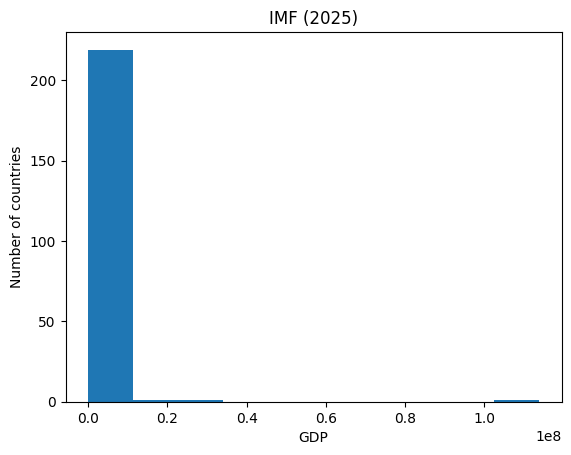

In [23]:
import matplotlib.pyplot as plt

# Build a histogram of IMF_Forecast
plt.hist(df['IMF (2025)'], bins=10)
plt.title('IMF (2025)')
plt.xlabel('GDP')
plt.ylabel('Number of countries')
plt.show()

На гістограмі можна побачити, що більшість країн перебувають у нижчій частині між 0 та 0.25 х 10° . Є деякі країни з більшим ВВП в
районі 0.5 × 10',
але є одиничні випадки далі у верхній межі.

14. Розрахуйте частку кожної країни в загальному значенні для кожного року (IMF (2025), World Bank (2022-24), United Nations
(2023)). Як змінюються частки країн з часом (дати відповідь)?

In [24]:
# Calculate share of world GDP for each country for each year
df['IMF_Share'] = df['IMF (2025)'] / df['IMF (2025)'].sum()
df['WB_Share'] = df['World Bank (2022–24)'] / df['World Bank (2022–24)'].sum()
df['UN_Share'] = df['United Nations (2023)'] / df['United Nations (2023)'].sum()

df.head(10)

,Country,IMF (2025),World Bank (2022–24),United Nations (2023),IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share
0,World,113795678.0,111326370.0,100834796.0,2469308.0,5.338800e+07,0.499233,0.500749,0.487441
1,United States,30507217.0,29184890.0,27720700.0,1322327.0,1.395413e+07,0.133838,0.131274,0.134003
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0,9.070739e+06,0.084371,0.084310,0.086021
3,Germany,4744804.0,4659929.0,4525704.0,84875.0,2.281086e+06,0.020816,0.020960,0.021878
4,India,4187017.0,3912686.0,3575778.0,274331.0,1.825940e+06,0.018369,0.017599,0.017286
5,Japan,4186431.0,4026211.0,4204495.0,160220.0,1.991026e+06,0.018366,0.018110,0.020325
6,United Kingdom,3839180.0,3643834.0,3380855.0,195346.0,1.723234e+06,0.016843,0.016390,0.016343
7,France,3211292.0,3162079.0,3051832.0,49213.0,1.547697e+06,0.014088,0.014223,0.014753
8,Italy,2422855.0,2372775.0,2300941.0,50080.0,1.158803e+06,0.010629,0.010673,0.011123
9,Canada,2225341.0,2241253.0,2142471.0,15912.0,1.094412e+06,0.009763,0.010081,0.010357


15. Візуалізуйте зміни в показниках для кожної країни за три роки на графіку. Які країни показують стабільне зростання або спад
(дати відповідь)?

In [25]:
# Find top 10 countries with the most significant change in share of world GDP between IMF and UN
df['IMF_UN_Diff'] = abs(df['IMF_Share'] - df['UN_Share'])
df_top10 = df.nlargest(10, 'IMF_UN_Diff')
df_top10

,Country,IMF (2025),World Bank (2022–24),United Nations (2023),IMF_WB_Diff,std,IMF_Share,WB_Share,UN_Share,IMF_UN_Diff
0,World,113795678.0,111326370.0,100834796.0,2469308.0,5.338800e+07,0.499233,0.500749,0.487441,0.011792
5,Japan,4186431.0,4026211.0,4204495.0,160220.0,1.991026e+06,0.018366,0.018110,0.020325,0.001958
2,China[n 1],19231705.0,18743803.0,17794782.0,487902.0,9.070739e+06,0.084371,0.084310,0.086021,0.001650
10,Brazil,2125958.0,2179412.0,2191132.0,53454.0,1.056404e+06,0.009327,0.009803,0.010592,0.001265
15,Mexico,1692640.0,1852723.0,1793799.0,160083.0,8.125126e+05,0.007426,0.008334,0.008671,0.001246
4,India,4187017.0,3912686.0,3575778.0,274331.0,1.825940e+06,0.018369,0.017599,0.017286,0.001083
3,Germany,4744804.0,4659929.0,4525704.0,84875.0,2.281086e+06,0.020816,0.020960,0.021878,0.001062
13,South Korea,1790322.0,1712793.0,1839058.0,77529.0,8.531833e+05,0.007854,0.007704,0.008890,0.001036
59,Nigeria,188271.0,187760.0,374984.0,511.0,1.528782e+05,0.000826,0.000845,0.001813,0.000987
16,Turkey,1437406.0,1323255.0,1118253.0,114151.0,6.040193e+05,0.006306,0.005952,0.005406,0.000900


Загалом можна побачити, що частка ВВП в світовій економіці залишається досить стабільною, що навіть найбільша зміна все ще у
межах десятиної частини відсотку.

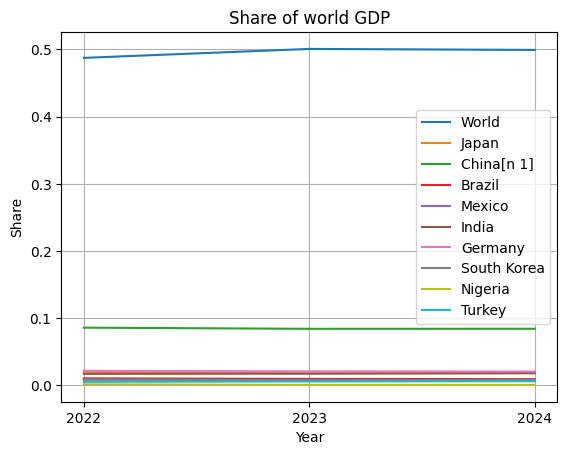

In [26]:
for index, row in df_top10.iterrows():
    plt.plot(row[['UN_Share', 'WB_Share', 'IMF_Share']], label=row['Country'])

plt.title('Share of world GDP')
plt.xlabel('Year')
plt.xticks(ticks=[0, 1, 2], labels=['2022', '2023', '2024'])
plt.ylabel('Share')
plt.legend()
plt.grid()
plt.show()